In [188]:
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# Erdbeschleunigung [m/s^2] 
g = 9.81 

# Masse [kg]
m = 100.0

# Länge des Pendels [m]
l = 2.0

# Reibung [kg/s]
k = 25.0

# Anfangsauslenkung
phi_0 = 0.1 

# Anfangsgeschwindigkeit
dotphi_0 = 0.0

# Zeitintervall
t0, t1 = 0.0, 30.0

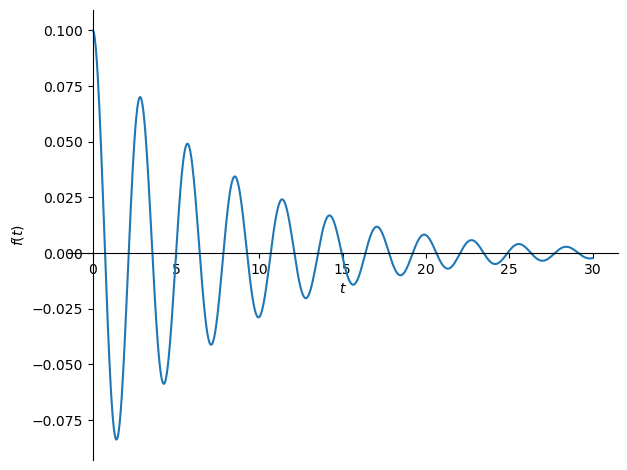

In [190]:
import sympy as sp

t = sp.Symbol('t')

phi = sp.Function('phi')(t)

phip = sp.Derivative(phi)
phipp = sp.Derivative(phip)

ode = sp.Eq(m*l*phipp + k*l*phip + m*g*phi, 0)

#anfangswert problem
initconds = {phi.subs(t, 0): phi_0, phip.subs(t, 0): dotphi_0}
sol = sp.dsolve(ode,ics=initconds)

display(sp.plot(sol.rhs,(t,t0,t1))) #rhs ist nur rechte seite

In [191]:
# Anfangsgeschwindigkeit
dotphi_0 = 5.0

In [192]:
# Ergänzen Sie bitte hier die Python Befehle für die Funktion swingBoatOde()

def swingBoatOde(t,z):
    swingBoatOde = np.array([z[1], - (k/m)*z[1] - (g/l)*np.sin(z[0]) ])
    return swingBoatOde

In [193]:
def swingBoatEuler(t0, tn, h, z0):
    n = int((tn-t0)/h)
    t = np.linspace(t0,tn,n+1)
    z = np.zeros([len(z0),n+1])  #Matrix der zustände...len ist length
    z[:,0] = z0      #erste zustand wird kopiert
    for k in range(n):
        z[:,k+1] = z[:,k]+h*swingBoatOde(t[k],z[:,k])
    return t, z

[Text(0.5, 0, '$t$'), Text(0, 0.5, '$z_1$')]

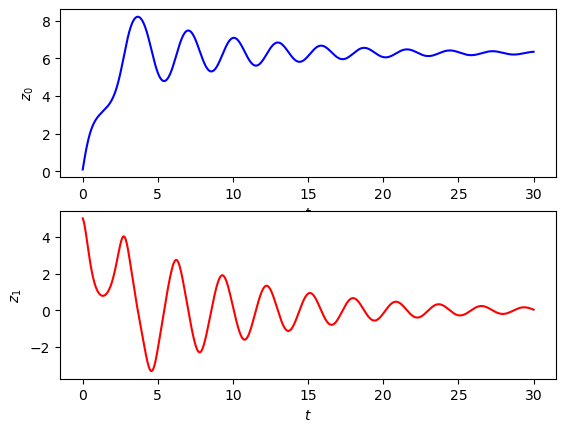

In [194]:
tn = t1 #end zeit
h = 0.001
z0 = np.array([phi_0,dotphi_0])   #startwert besteht aus 2 zahlen
t, z = swingBoatEuler(t0,tn,h,z0)

#plot für zustand z0 und z1
fig, (ax1,ax2) = plt.subplots(2,1)  #2 graphen erstellt (2,1) 2 zeilen , 1 spalte
ax1.plot(t,z[0,:],'b')      #zustand z0  the : in z[0, :] z0 zu alle spalten 
ax1.set(xlabel='$t$', ylabel='$z_0$')
ax2.plot(t,z[1,:],'r')      #zustand z1
ax2.set(xlabel='$t$', ylabel='$z_1$')

[Text(0.5, 0, '$x(t)$'), Text(0, 0.5, "$x'(t)$")]

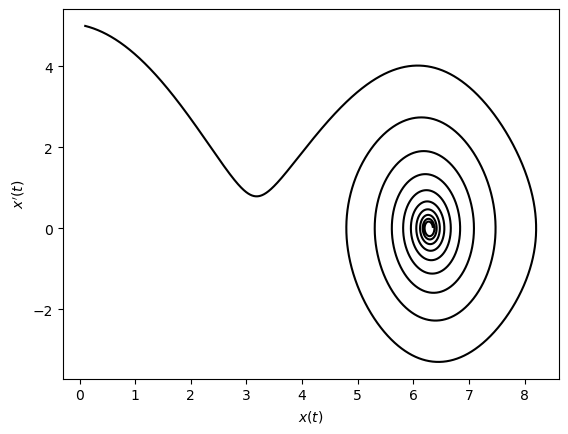

In [195]:
#plot für phasen portrait
fig, ax = plt.subplots()
ax.plot(z[0,:],z[1,:],'k')
ax.set(xlabel='$x(t)$', ylabel="$x'(t)$")

In [196]:
def swingBoatDraw(phi):

    # clear figure
    fig.clf()
    
    # get axis of figure
    ax = fig.gca()
    
    # set axis properties
    ax.axis('equal')
    ax.axis('off')
    ax.axis([-3.0, 3.0, -3.2, 3.0])
    
    # Rotationsmatrix
    R = np.array([[np.cos(phi),-np.sin(phi)],[np.sin(phi),np.cos(phi)]])
 
    # Grundplatte der Schiffschaukel (ohne Rotation)
    ground = np.array([[-2.0,  2.0,  2.0, -2.0, -2.0],
                       [-3.2, -3.2, -3.0, -3.0, -3.2]])
    ax.fill(ground[0],ground[1],'darkgray')

    # Gestell der Schiffschaukel (ohne Rotation)
    frame = np.array([[-1.5, 0.0,  1.5, np.nan, -1.0,  1.0],
                      [-3.0, 0.0, -3.0, np.nan, -2.0, -2.0]])
    ax.plot(frame[0],frame[1],'b',linewidth=5)
    
    # Schiffchen der Schiffschaukel (mit Rotation)
    boat = R@np.array([[ 0.5,  0.8, -0.8, -0.5,  0.5, np.nan, -0.4, 0.0,  0.4],
                       [-2.8, -2.3, -2.3, -2.8, -2.8, np.nan, -2.3, 0.0, -2.3]])
    ax.plot(boat[0],boat[1],'r',linewidth=3)
    
    # Kopf der Person (mit Rotation)
    tt = np.linspace(0.0,2.0*np.pi,20)
    head = R@np.array([0.13*np.cos(tt),-1.1+0.13*np.sin(tt)])
    ax.plot(head[0],head[1],'k',linewidth=3)

    # Körper der Person (mit Rotation)
    body = R@np.array([[np.nan,   0.0,  0.0,  0.2,  0.2, np.nan,  0.0,  0.1,  0.2],
                       [np.nan, -1.23, -2.0, -2.4, -2.8, np.nan, -1.4, -1.7, -1.3]])
    ax.plot(body[0],body[1],'k',linewidth=3)

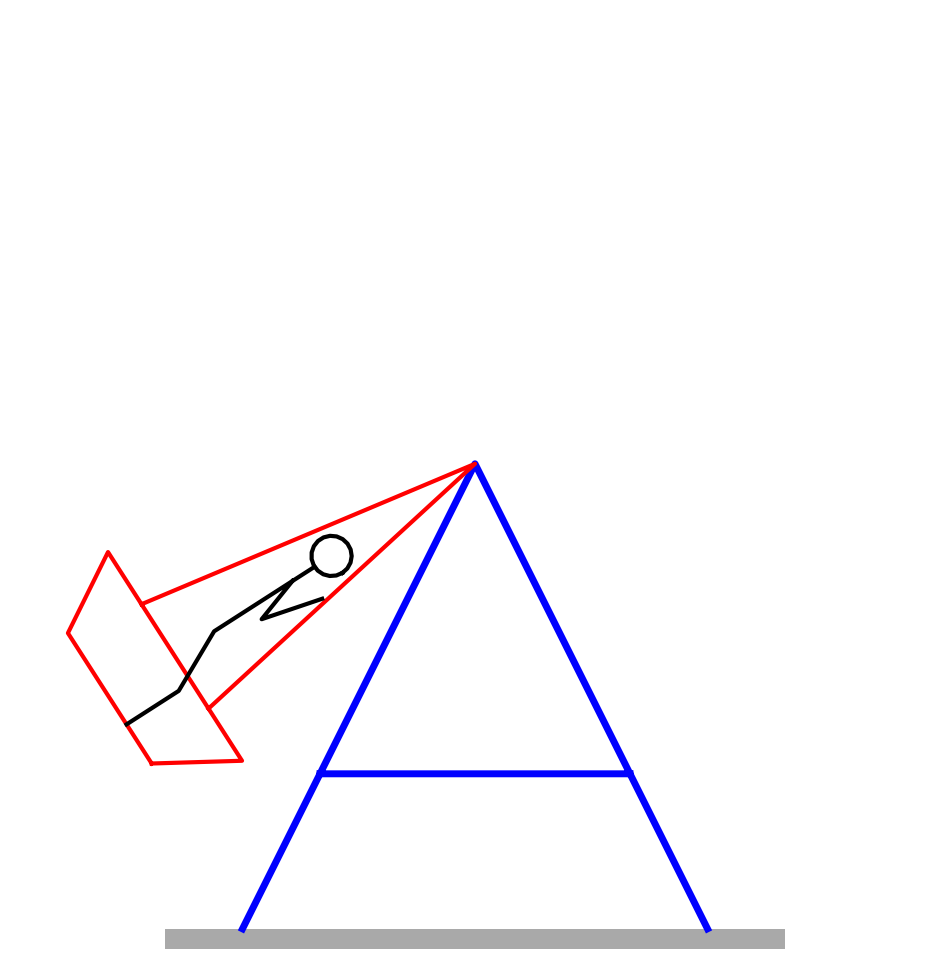

In [197]:
fig, ax = plt.subplots(figsize=(12.0,12.2))
swingBoatDraw(-1)

In [198]:
from IPython.display import IFrame, display

if 'google.colab' in str(get_ipython()):
    print('IFrame() does not work with Google Colab')
else:
    display(IFrame('swingboat.gif', width=864, height=892))


In [199]:
import matplotlib.animation 

ani = matplotlib.animation.FuncAnimation(fig, swingBoatDraw, frames=z[0,300*np.arange(0,100)])



In [200]:
import HTML

display(HTML(ani.to_jshtml()))

ModuleNotFoundError: No module named 'HTML'

In [ ]:
print(matplotlib.animation.writers.list())

In [201]:
ani.save('animation_save_test.html', writer='html')